<div style =   "color           : white  ;
                display         : flex   ;
                align-items     : center ;
                justify-content : center ;
                border-radius   : 5px    ;
                background-color: #141f1f;
                font-size       : 200%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 20px;
            margin : auto;
            color  : white"    >
Diabetes Explory Data Analysis
</p>
</div>



<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #283e3e;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 30px;
            color  : white"    >
Author  : Ezzat Hegazy.<br>
Date    : 24 JUNE 2023.<br>
Version : 1.
</p>
</div>

<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
Toolkit
</p>
</div>

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import robust_scale
from sklearn.impute import KNNImputer

from datasist.structdata import detect_outliers

from scipy.stats import multivariate_normal as mn
from IPython.display import display, HTML

import dash_bootstrap_components as dbc 
from dash.dependencies import Input, Output, State 
from dash import dcc 
from dash import html 

import plotly.graph_objects as go
import plotly.express as px 
import plotly.figure_factory as ff
import plotly.io as pio

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 4]}, font_scale=1.3)
pio.templates.default = "plotly_dark"

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th 
{
    border: 2px black solid !important;
    color: white !important;
}
</style>


In [4]:
font1 = {'family':'serif','color':'black','size':25}
font2 = {'family':'serif','color':'#374c80','size':18}

<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
Load and Inspect dataset
</p>
</div>

In [5]:
diabetes_data = pd.read_csv(r"diabetes.csv")
diabetes_data.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [6]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
round(diabetes_data.describe(), 2)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
count       768.00   768.00         768.00         768.00   768.00  768.00   
mean          3.85   120.89          69.11          20.54    79.80   31.99   
std           3.37    31.97          19.36          15.95   115.24    7.88   
min           0.00     0.00           0.00           0.00     0.00    0.00   
25%           1.00    99.00          62.00           0.00     0.00   27.30   
50%           3.00   117.00          72.00          23.00    30.50   32.00   
75%           6.00   140.25          80.00          32.00   127.25   36.60   
max          17.00   199.00         122.00          99.00   846.00   67.10   

       DiabetesPedigreeFunction     Age  Outcome  
count                    768.00  768.00   768.00  
mean                       0.47   33.24     0.35  
std                        0.33   11.76     0.48  
min                        0.08   21.00     0.00  
25%                        0.24   24.00     0.00  
50%                        0.37   29.00     0.00  
75%                        0.63   41.00     1.00  
max                        2.42   81.00     1.00

The minimum values of `0.0` suggests the presence of missing data for these variables:

* `Glucose`
* `BloodPressure`
* `SkinThickness`
* `Insulin`
* `BMI`

However, it is important to note that the values of `Pregnancies` and `DiabetesPedigreeFunction` may be equal to zero and should not be considered as missing values.

In addition to missing data, the dataset also contains some outliers that should be taken into consideration.

* The `Insulin` maximum level  of `846` is significantly higher than the normal range of `16`-`166` for 2-hour serum insulin levels.
* The maximum value of `17` for the `Pregnancy` variable is not impossible, but it may be worth investigating to confirm its accuracy.
* The maximum value of `99` for `SkinThickness` is also worth looking into.

In [8]:
sample = diabetes_data.sample(10)
sample

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
81             2       74              0              0        0   0.0   
665            1      112             80             45      132  34.8   
713            0      134             58             20      291  26.4   
619            0      119              0              0        0  32.4   
226            0      101             76              0        0  35.7   
509            8      120             78              0        0  25.0   
325            1      157             72             21      168  25.6   
468            8      120              0              0        0  30.0   
421            2       94             68             18       76  26.0   
613            6      105             80             28        0  32.5   

     DiabetesPedigreeFunction  Age  Outcome  
81                      0.102   22        0  
665                     0.217   24        0  
713                     0.352   21        0  
619                     0.141   24        1  
226                     0.198   26        0  
509                     0.409   64        0  
325                     0.123   24        0  
468                     0.183   38        1  
421                     0.561   21        0  
613                     0.878   26        0

<div style =   "color           : white  ;
                display         : fill   ;
                border-radius   : 5px    ;
                background-color: #133926;
                font-size       : 150%   ;
                font-family     : Verdana;
                letter-spacing  : 0.5px   " >

<p style = "padding: 15px;
            color  : white"    >
Preprocessing
</p>
</div>

### Check for nulls

In [9]:
diabetes_data.isnull().any().sum()

0

`No Nulls`

### Check for duplicate

In [10]:
diabetes_data.duplicated().sum()

0

`No duplicates`

### Missing values (taht don't make sense)

In [11]:
diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].applymap(lambda x: np.NaN if x==0 else x)

In [12]:
diabetes_data.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Percentage of nulls

In [13]:
(diabetes_data.isna().sum()/diabetes_data.shape[0])*100

Pregnancies                  0.000000
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

`Drop rows with nulls in columns between 1-5 percent [Glucose, BloodPressure, BMI]`

In [14]:
diabetes_data.dropna(subset=['Glucose', 'BloodPressure', 'BMI'], inplace=True)


In [15]:
(diabetes_data.isna().sum()/diabetes_data.shape[0])*100

Pregnancies                  0.000000
Glucose                      0.000000
BloodPressure                0.000000
SkinThickness               26.519337
Insulin                     45.856354
BMI                          0.000000
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                      0.000000
dtype: float64

In [16]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    int64  
 1   Glucose                   724 non-null    float64
 2   BloodPressure             724 non-null    float64
 3   SkinThickness             532 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       724 non-null    float64
 6   DiabetesPedigreeFunction  724 non-null    float64
 7   Age                       724 non-null    int64  
 8   Outcome                   724 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 56.6 KB


### Replace missing values with mean

In [17]:
imputer = KNNImputer(n_neighbors=3)
# Select the columns to impute
columns_to_impute = ['SkinThickness', 'Insulin']

# Create a copy of the DataFrame with the selected columns
df_selected = diabetes_data[columns_to_impute].copy()

# Perform imputation using KNNImputer
imputed_values = imputer.fit_transform(df_selected)

# Replace the NaN values in the original DataFrame with the imputed values
diabetes_data['SkinThickness'] = imputed_values[:, 0]
diabetes_data['Insulin'] = imputed_values[:, 1]

In [18]:
diabetes_data.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0             6    148.0           72.0      35.000000  142.333333  33.6   
1             1     85.0           66.0      29.000000  200.666667  26.6   
2             8    183.0           64.0      29.182331  156.056122  23.3   
3             1     89.0           66.0      23.000000   94.000000  28.1   
4             0    137.0           40.0      35.000000  168.000000  43.1   
5             5    116.0           74.0      29.182331  156.056122  25.6   
6             3     78.0           50.0      32.000000   88.000000  31.0   
8             2    197.0           70.0      45.000000  543.000000  30.5   
10            4    110.0           92.0      29.182331  156.056122  37.6   
11           10    168.0           74.0      29.182331  156.056122  38.0   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
8                      0.158   53        1  
10                     0.191   30        0  
11                     0.537   34        1

In [19]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    int64  
 1   Glucose                   724 non-null    float64
 2   BloodPressure             724 non-null    float64
 3   SkinThickness             724 non-null    float64
 4   Insulin                   724 non-null    float64
 5   BMI                       724 non-null    float64
 6   DiabetesPedigreeFunction  724 non-null    float64
 7   Age                       724 non-null    int64  
 8   Outcome                   724 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 56.6 KB


In [20]:
diabetes_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   724.000000  724.000000     724.000000     724.000000  724.000000   
mean      3.866022  121.882597      72.400552      29.182331  156.623999   
std       3.362803   30.750030      12.379870       9.018907   94.494791   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  105.000000   
50%       3.000000  117.000000      72.000000      29.182331  156.056122   
75%       6.000000  142.000000      80.000000      33.000000  165.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  724.000000                724.000000  724.000000  724.000000  
mean    32.467127                  0.474765   33.350829    0.343923  
std      6.888941                  0.332315   11.765393    0.475344  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.245000   24.000000    0.000000  
50%     32.400000                  0.379000   29.000000    0.000000  
75%     36.600000                  0.627500   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

## Detect and handle Outliers

In [21]:
fig = px.box(diabetes_data)
fig.update_layout(width=1200, height=500)
fig.show()

### Replace with median

In [22]:
# for col in diabetes_data.columns:
#     outliers_indices = detect_outliers(diabetes_data, 0, [col])
#     col_median = diabetes_data[col].median()
    
#     # Check if any outliers are found
#     if len(outliers_indices) > 0:
#         # Filter out the indices that are within the DataFrame size
#         valid_indices = [idx for idx in outliers_indices if idx < len(diabetes_data)]
#         # Replace the outliers with the column median
#         diabetes_data.loc[valid_indices, col] = col_median

In [23]:
# fig = px.box(diabetes_data)
# fig.update_layout(width=1200, height=500)
# fig.show()

In [24]:
def handle_outliers(data, column):
    # Calculate the lower and upper bounds using the IQR method
    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Identify outliers
    outliers = (data[column] < lower_bound) | (data[column] > upper_bound)

    # Replace outliers with the median of non-outlier values
    non_outliers = data[column][~outliers]
    median_non_outliers = np.median(non_outliers)
    data.loc[outliers, column] = median_non_outliers

    return data

In [25]:
# Iterate over each column in the DataFrame
for column in diabetes_data.columns:
    
    # Apply the outlier handling function to the column
    diabetes_data = handle_outliers(diabetes_data, column)

In [26]:
fig = px.box(diabetes_data)
fig.update_layout(width=1200, height=500)
fig.show()

## EDA

Skewness

In [27]:
diabetes_data.groupby('Outcome').agg(['mean', 'median'])

Pregnancies            Glucose        BloodPressure         \
               mean median        mean median          mean median   
Outcome                                                              
0          3.320000    2.0  111.016842  108.0     70.764211   70.0   
1          4.714859    4.0  142.610442  142.0     74.662651   74.0   

        SkinThickness                Insulin                    BMI         \
                 mean     median        mean      median       mean median   
Outcome                                                                      
0           27.895287  29.182331  124.594529  140.000000  30.879789   30.4   
1           30.555863  29.182331  149.826134  156.056122  34.805221   34.1   

        DiabetesPedigreeFunction               Age         
                            mean median       mean median  
Outcome                                                    
0                       0.402086  0.338  30.823158   27.0  
1                       0.481554  0.398  37.024096   36.0

In [28]:
for col in diabetes_data.columns:
    hist_data = [diabetes_data[col].to_list()]
    fig = ff.create_distplot(hist_data, [col])
    
    fig.update_xaxes(title_text=col)
    fig.update_yaxes(title_text="count")
    fig.show()

Scatter matrix

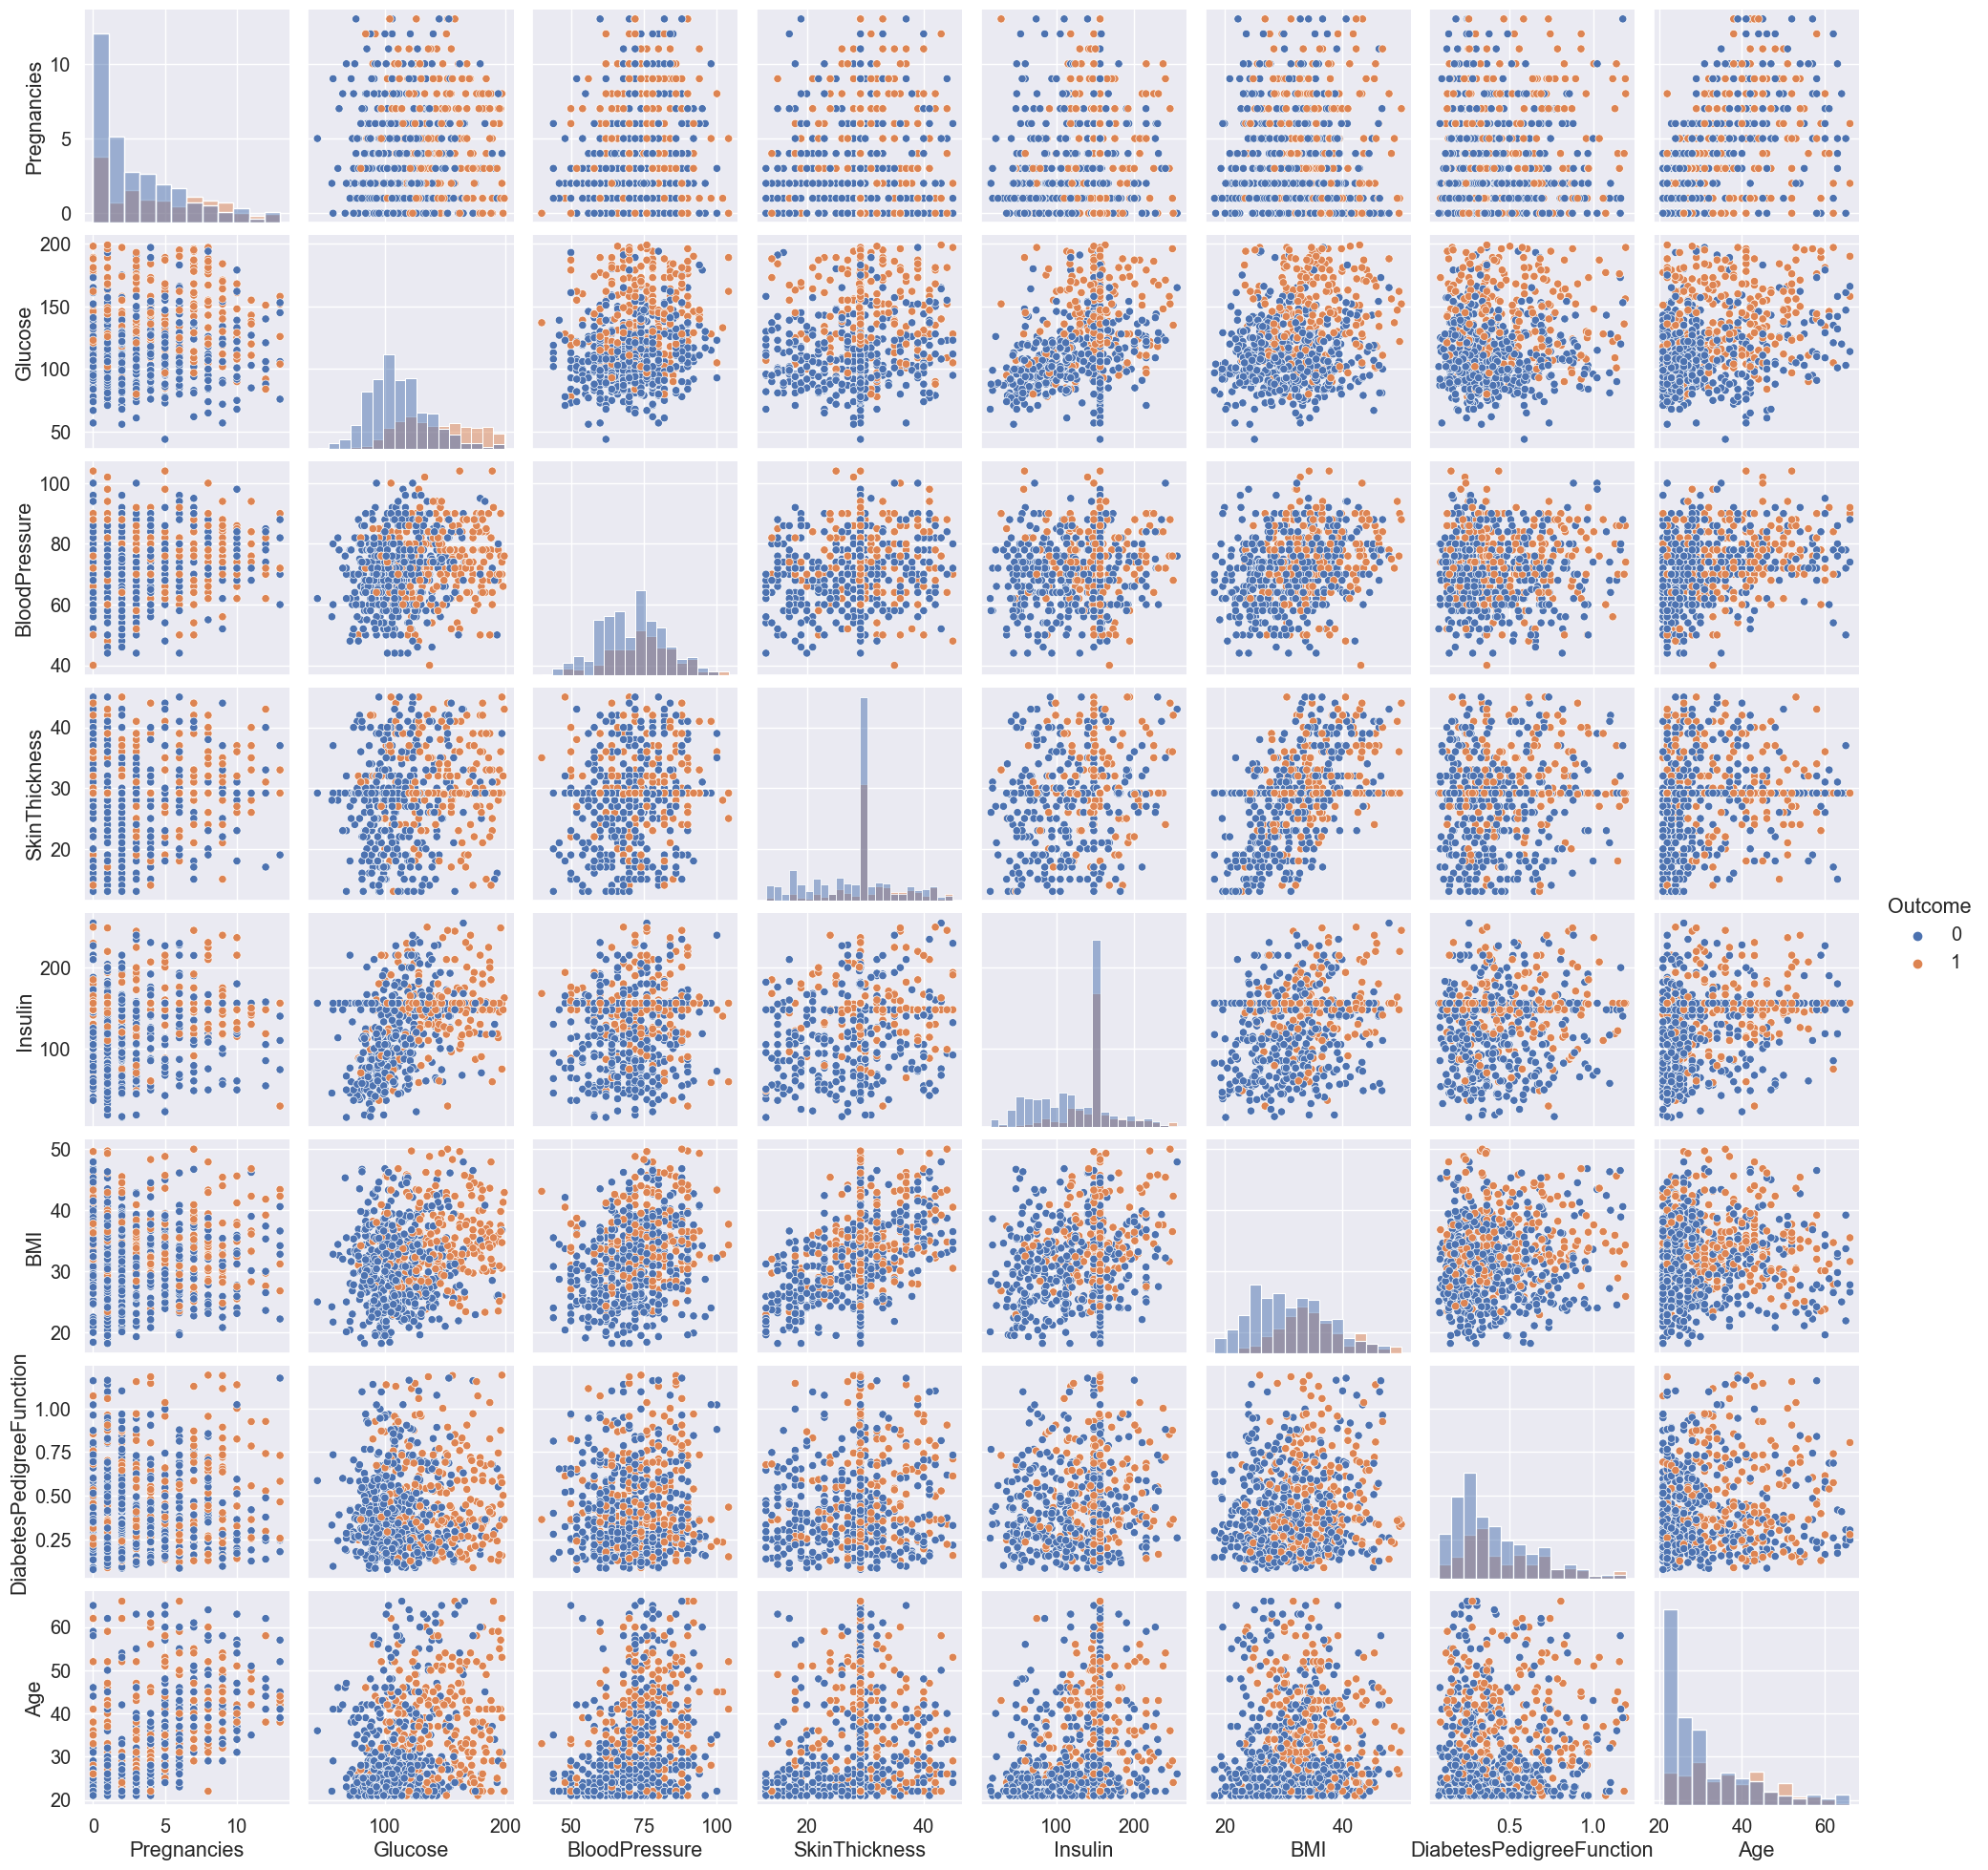

In [29]:
# fig = px.scatter_matrix(diabetes_data,
#                         dimensions=['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age',	'Outcome'])

# fig.update_layout(width=1200, height=1000)
# fig.show()
sns.pairplot(diabetes_data, hue='Outcome', diag_kind='hist')

In [30]:
px.imshow(diabetes_data.corr().round(2), text_auto=True)

In [31]:
diabetes_data.to_csv("Diabetes-modified.csv")